<a href="https://colab.research.google.com/github/roksolanamonastyrska/global-sales-data-analysis/blob/main/Python_for_DA_Module_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data overview

##Підключення даних

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Connecting Google Drive
from google.colab import drive
drive.mount("/content/drive")

# Changing work folder
%cd /content/drive/MyDrive/Mate_homework/dataset/Final_project

Mounted at /content/drive
/content/drive/MyDrive/Mate_homework/dataset/Final_project


In [ ]:
# Uploading dataset
countries = pd.read_csv("countries.csv")
countries.head()

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


У цій таблиці маємо дані про країни, регіони, субрегіони та їх коди щодо продажів продукції компанії

In [ ]:
# Uploading dataset
events = pd.read_csv("events.csv")
events.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


У цій таблиці маємо детальні дані про продажі за декілька років

In [ ]:
events.describe()

,Order ID,Product ID,Units Sold,Unit Price,Unit Cost
count,1.330000e+03,1330.000000,1328.000000,1330.000000,1330.000000
mean,5.412048e+08,5788.096241,4952.201807,264.893541,187.246812
std,2.573882e+08,2820.728878,2905.198996,217.323460,176.158873
min,1.006406e+08,1270.000000,2.000000,9.330000,6.920000
25%,3.190004e+08,3127.000000,2356.750000,81.730000,35.840000
50%,5.387164e+08,5988.000000,4962.000000,154.060000,97.440000
75%,7.544628e+08,8681.000000,7459.500000,437.200000,263.330000
max,9.998797e+08,8969.000000,9999.000000,668.270000,524.960000


Основні підрахунки по кількісним значенням

In [ ]:
# Uploading dataset
products = pd.read_csv("products.csv")
products.head()

,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


У цій таблиці маємо дані про категорії товарів та їх коди

**Ключові поля**

Таблицю країн будемо приєднувати до таблиці продажів за кодом країни. А таблицю категорій до таблиці продажів приєднаємо за допомогою id товарів

#Data cleaning

##Огляд даних

In [ ]:
print(f"У таблиці країн - {countries.shape} рядків та колонок")
print(f"У таблиці продажів - {events.shape} рядків та колонок")
print(f"У таблиці категорій товарів - {products.shape} рядків та колонок")

У таблиці країн - (249, 5) рядків та колонок
У таблиці продажів - (1330, 10) рядків та колонок
У таблиці категорій товарів - (12, 2) рядків та колонок


In [ ]:
print("Загальна інформація про таблицю по крїнам")
countries.info()

print("\nЗагальна інформація про таблицю по продажам")
events.info()

print("\nЗагальна інформація про таблицю по категоріям продуктів")
products.info()

Загальна інформація про таблицю по крїнам
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB

Загальна інформація про таблицю по продажам
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1

##Кількість пропущених значень у кожному датасеті

In [ ]:
print(f"Кількість пропущених значень по країнах \n{countries.isna().sum()}")

print(f"\nКількість пропущених значень по продажам \n{events.isna().sum()}")

print(f"\nКількість пропущених значень по категоріям продуктів \n{products.isna().sum()}")

Кількість пропущених значень по країнах 
name          0
alpha-2       1
alpha-3       0
region        1
sub-region    1
dtype: int64

Кількість пропущених значень по продажам 
Order ID           0
Order Date         0
Ship Date          0
Order Priority     0
Country Code      82
Product ID         0
Sales Channel      0
Units Sold         2
Unit Price         0
Unit Cost          0
dtype: int64

Кількість пропущених значень по категоріям продуктів 
id           0
item_type    0
dtype: int64


##Доля пропущених даних по таблицях. Заповнення/усування пропусків

In [ ]:
print(f"Доля пропущених даних у загальній кількості по країнах \n{countries.isna().sum() / countries.shape[0] * 100}")

Доля пропущених даних у загальній кількості по країнах 
name          0.000000
alpha-2       0.401606
alpha-3       0.000000
region        0.401606
sub-region    0.401606
dtype: float64


З попередніх розрахунків бачимо, що якась країна немає коду та призначеного регіону та субрегіону. Припускаю, що у колонці name може бути вказана назва частини світу, або щось подібне.

Оскільки, у цій таблиці всі записи унікальні і немає сенсу заповнювати пропущені значення чимось попереднім, то видалимо цей рядок

In [ ]:
#видалення пропущених значень з таблиці країн
countries.dropna()

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia
...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,Oceania,Polynesia
245,Western Sahara,EH,ESH,Africa,Northern Africa
246,Yemen,YE,YEM,Asia,Western Asia
247,Zambia,ZM,ZMB,Africa,Sub-Saharan Africa


In [ ]:
print(f"\nДоля пропущених даних у загальній кількості по продажам \n{events.isna().sum() / events.shape[0] * 100}")


Доля пропущених даних у загальній кількості по продажам 
Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      6.165414
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.150376
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64


У ситуації з таблицею продажів у нас аж 82 пропущені комірки у колонці Country Code, тому заповнимо ці комірки значенням "Undefined".

In [ ]:
#заповнення пропусків у Country Code
events["Country Code"] = events["Country Code"].fillna("Undefined")

Щодо пропущених даних у колонці Units Sold заповнимо її середньою к-стю проданих товарів загалом. Оскільки, як ми бачимо з попередніх розрахунків медіана та середнє значення цього показника майже одинакові.

In [ ]:
#заповнення пропусків у Units Sold
events["Units Sold"] = events["Units Sold"].fillna(events["Units Sold"].mean())

In [ ]:
print(f"\nДоля пропущених даних у загальній кількості по категоріям продуктів \n{products.isna().sum() / products.shape[0] * 100}")


Доля пропущених даних у загальній кількості по категоріям продуктів 
id           0.0
item_type    0.0
dtype: float64


У таблиці про категорії товарів немає пропущених даних

##Перетворення даних

In [ ]:
# Перетворення даних у колонках з датами у правильний формат
events["Order Date"] = pd.to_datetime(events["Order Date"])
events["Ship Date"] = pd.to_datetime(events["Ship Date"])
print(events.dtypes)

Order ID                   int64
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Order Priority            object
Country Code              object
Product ID                 int64
Sales Channel             object
Units Sold               float64
Unit Price               float64
Unit Cost                float64
dtype: object


In [ ]:
#Перетворення значень у колонці Sales Channel в одинаковий формат
events["Sales Channel"] = events["Sales Channel"].str.title()

##Аналіз наявністі дублікатів у таблицях

In [ ]:
#Перевірка таблиці про країни на дублікати
countries_duplicate_rows = countries.duplicated()
print(countries_duplicate_rows)
print(f"\nУ таблиці {countries_duplicate_rows.sum()} дублікатів")

0      False
1      False
2      False
3      False
4      False
       ...  
244    False
245    False
246    False
247    False
248    False
Length: 249, dtype: bool

У таблиці 0 дублікатів


In [ ]:
#Перевірка таблиці про продажі на дублікати
events_duplicate_rows = events.duplicated()
print(events_duplicate_rows)
print(f"\nУ таблиці {events_duplicate_rows.sum()} дублікатів")

0       False
1       False
2       False
3       False
4       False
        ...  
1325    False
1326    False
1327    False
1328    False
1329    False
Length: 1330, dtype: bool

У таблиці 0 дублікатів


In [ ]:
#Перевірка таблиці про продукти на дублікати
products_duplicate_rows = products.duplicated()
print(products_duplicate_rows)
print(f"\nУ таблиці {products_duplicate_rows.sum()} дублікатів")

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
dtype: bool

У таблиці 0 дублікатів


#Data analysis and visualization

##Об'єднання таблиць в один датафрейм

In [ ]:
#Перейменовування колонок у таблиці
countries = countries.rename(columns={"alpha-3": "Country Code", "name": "Country", "region": "Region", "sub-region": "Sub-Region"})
countries.head()

,Country,alpha-2,Country Code,Region,Sub-Region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In [ ]:
#Об'єднання таблиці про країни і продажі
first_join = pd.merge(events, countries, on="Country Code", how="left")
print(first_join)

       Order ID Order Date  Ship Date Order Priority Country Code  Product ID  \
0     100640618 2014-10-08 2014-10-18              M          NOR        2103   
1     100983083 2016-08-11 2016-08-11              C          SRB        2103   
2     101025998 2014-07-18 2014-08-11              M    Undefined        7940   
3     102230632 2017-05-13 2017-06-13              L          MNE        2455   
4     103435266 2012-08-11 2012-09-18              H          SRB        1270   
...         ...        ...        ...            ...          ...         ...   
1325  994504153 2017-01-10 2017-01-13              M          SWE        4594   
1326  994978797 2014-12-05 2015-01-02              H          ITA        1270   
1327  996754205 2010-09-20 2010-09-22              L          RUS        7331   
1328  998043382 2010-06-15 2010-07-03              H          MLT        8293   
1329  999879729 2012-03-31 2012-05-06              M          ALB        7940   

     Sales Channel  Units S

In [ ]:
#Пепірка на наявність пропущених значень після об'єднання таблиць про країни і продажі
print(f"\nКількість пропущених значень по продажам \n{first_join.isna().sum()}")


Кількість пропущених значень по продажам 
Order ID           0
Order Date         0
Ship Date          0
Order Priority     0
Country Code       0
Product ID         0
Sales Channel      0
Units Sold         0
Unit Price         0
Unit Cost          0
Country           82
alpha-2           82
Region            82
Sub-Region        82
dtype: int64


In [ ]:
#Заповнення пропущених значень у об'єднаній таблиці
first_join["Country"] = first_join["Country"].fillna("Undefined")
first_join["alpha-2"] = first_join["alpha-2"].fillna("Undefined")
first_join["Region"] = first_join["Region"].fillna("Undefined")
first_join["Sub-Region"] = first_join["Sub-Region"].fillna("Undefined")

In [ ]:
#Перейменовування колонок у таблиці
products = products.rename(columns={"id": "Product ID", "item_type": "Category"})
products.head()

,Product ID,Category
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


In [ ]:
#Приєднання останньої таблиці і створення основного датасету для аналізу
df = pd.merge(first_join, products, on="Product ID", how="inner")
print(df)

       Order ID Order Date  Ship Date Order Priority Country Code  Product ID  \
0     100640618 2014-10-08 2014-10-18              M          NOR        2103   
1     100983083 2016-08-11 2016-08-11              C          SRB        2103   
2     101025998 2014-07-18 2014-08-11              M    Undefined        7940   
3     102230632 2017-05-13 2017-06-13              L          MNE        2455   
4     103435266 2012-08-11 2012-09-18              H          SRB        1270   
...         ...        ...        ...            ...          ...         ...   
1325  994504153 2017-01-10 2017-01-13              M          SWE        4594   
1326  994978797 2014-12-05 2015-01-02              H          ITA        1270   
1327  996754205 2010-09-20 2010-09-22              L          RUS        7331   
1328  998043382 2010-06-15 2010-07-03              H          MLT        8293   
1329  999879729 2012-03-31 2012-05-06              M          ALB        7940   

     Sales Channel  Units S

##Ключові метрики діяльності компанії

In [ ]:
#Основні розрахунки для визначення продажів, доходів та витрат компанії
df["Sales"] = df["Units Sold"] * df["Unit Price"]
df["Cost"] = df["Units Sold"] * df["Unit Cost"]
df["Profit"] = df["Sales"] - df["Cost"]

df.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,Country,alpha-2,Region,Sub-Region,Category,Sales,Cost,Profit
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Norway,NO,Europe,Northern Europe,Cereal,133705.00,76121.50,57583.50
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Serbia,RS,Europe,Southern Europe,Cereal,409960.10,233400.23,176559.87
2,101025998,2014-07-18,2014-08-11,M,Undefined,7940,Online,4693.0,668.27,502.54,Undefined,Undefined,Undefined,Undefined,Household,3136191.11,2358420.22,777770.89
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Montenegro,ME,Europe,Southern Europe,Clothes,127966.88,41968.64,85998.24
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Serbia,RS,Europe,Southern Europe,Beverages,362897.60,243129.92,119767.68


In [ ]:
#Розрахунок ключових метрик
number_of_orders = df["Order ID"].count()
total_sales = df["Sales"].sum()
total_profit = df["Profit"].sum()
total_cost = df["Cost"].sum()
profitability = round((total_profit / total_sales * 100), 2)
number_of_countries = df["Country"].nunique()

print(f"Total number of orders: {number_of_orders}")
print(f"Total Sales: ${total_sales:.2f}")
print(f"Total Profit: ${total_profit:.2f}")
print(f"Total Cost: ${total_cost:.2f}")
print(f"Profitability: {profitability}%")
print(f"Number of countries: {number_of_countries}")

Total number of orders: 1330
Total Sales: $1704623436.08
Total Profit: $501841827.12
Total Cost: $1202781608.96
Profitability: 29.44%
Number of countries: 46


##Аналіз продажів у різних розрізах

###Аналіз продажів у розрізі категорій товарів

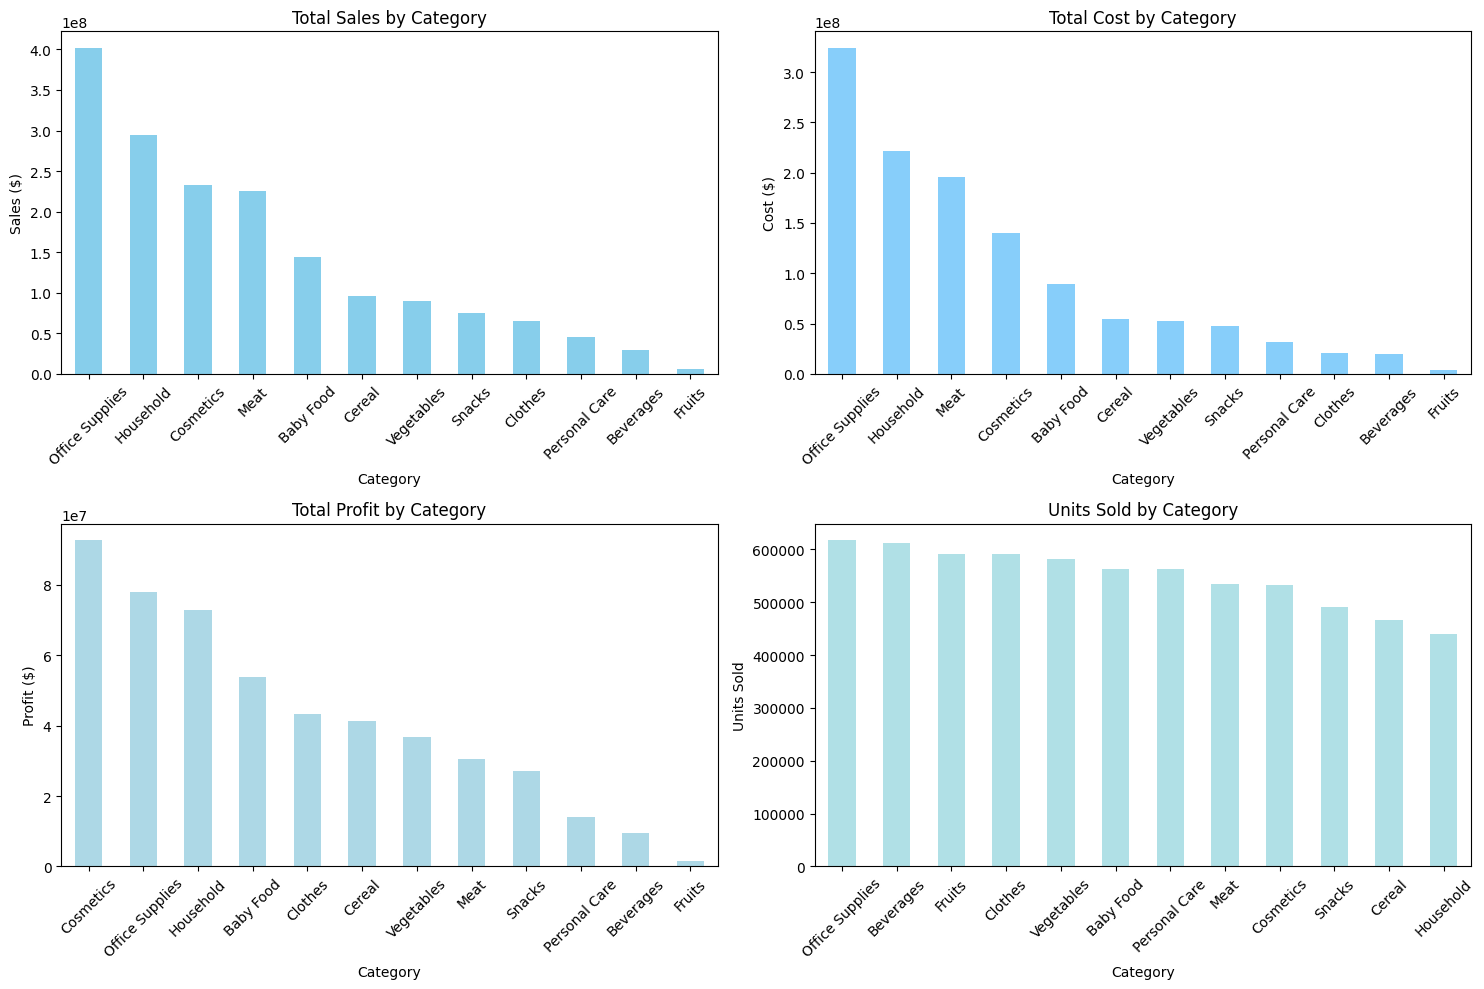

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

#Аналіз та візуалізація продажів за категоріями товарів
df.groupby("Category")["Sales"].sum().sort_values(ascending=False).plot(kind="bar", ax=ax[0, 0], color="skyblue")
ax[0, 0].set_title("Total Sales by Category")
ax[0, 0].set_xlabel("Category")
ax[0, 0].set_ylabel("Sales ($)")
ax[0, 0].tick_params(axis="x", rotation=45)

#Аналіз та візуалізація витрат за категоріями товарів
df.groupby("Category")["Cost"].sum().sort_values(ascending=False).plot(kind="bar", ax=ax[0, 1], color="lightskyblue")
ax[0, 1].set_title("Total Cost by Category")
ax[0, 1].set_xlabel("Category")
ax[0, 1].set_ylabel("Cost ($)")
ax[0, 1].tick_params(axis="x", rotation=45)

#Аналіз та візуалізація доходів за категоріями товарів
df.groupby("Category")["Profit"].sum().sort_values(ascending=False).plot(kind="bar", ax=ax[1, 0], color="lightblue")
ax[1, 0].set_title("Total Profit by Category")
ax[1, 0].set_xlabel("Category")
ax[1, 0].set_ylabel("Profit ($)")
ax[1, 0].tick_params(axis="x", rotation=45)

#Аналіз та візуалізація к-сть проданих товарів за категоріями товарів
df.groupby("Category")["Units Sold"].sum().sort_values(ascending=False).plot(kind="bar", ax=ax[1, 1], color="powderblue")
ax[1, 1].set_title("Units Sold by Category")
ax[1, 1].set_xlabel("Category")
ax[1, 1].set_ylabel("Units Sold")
ax[1, 1].tick_params(axis="x", rotation=45)

plt.tight_layout()

plt.show()

###Аналіз продажів у розрізі країн

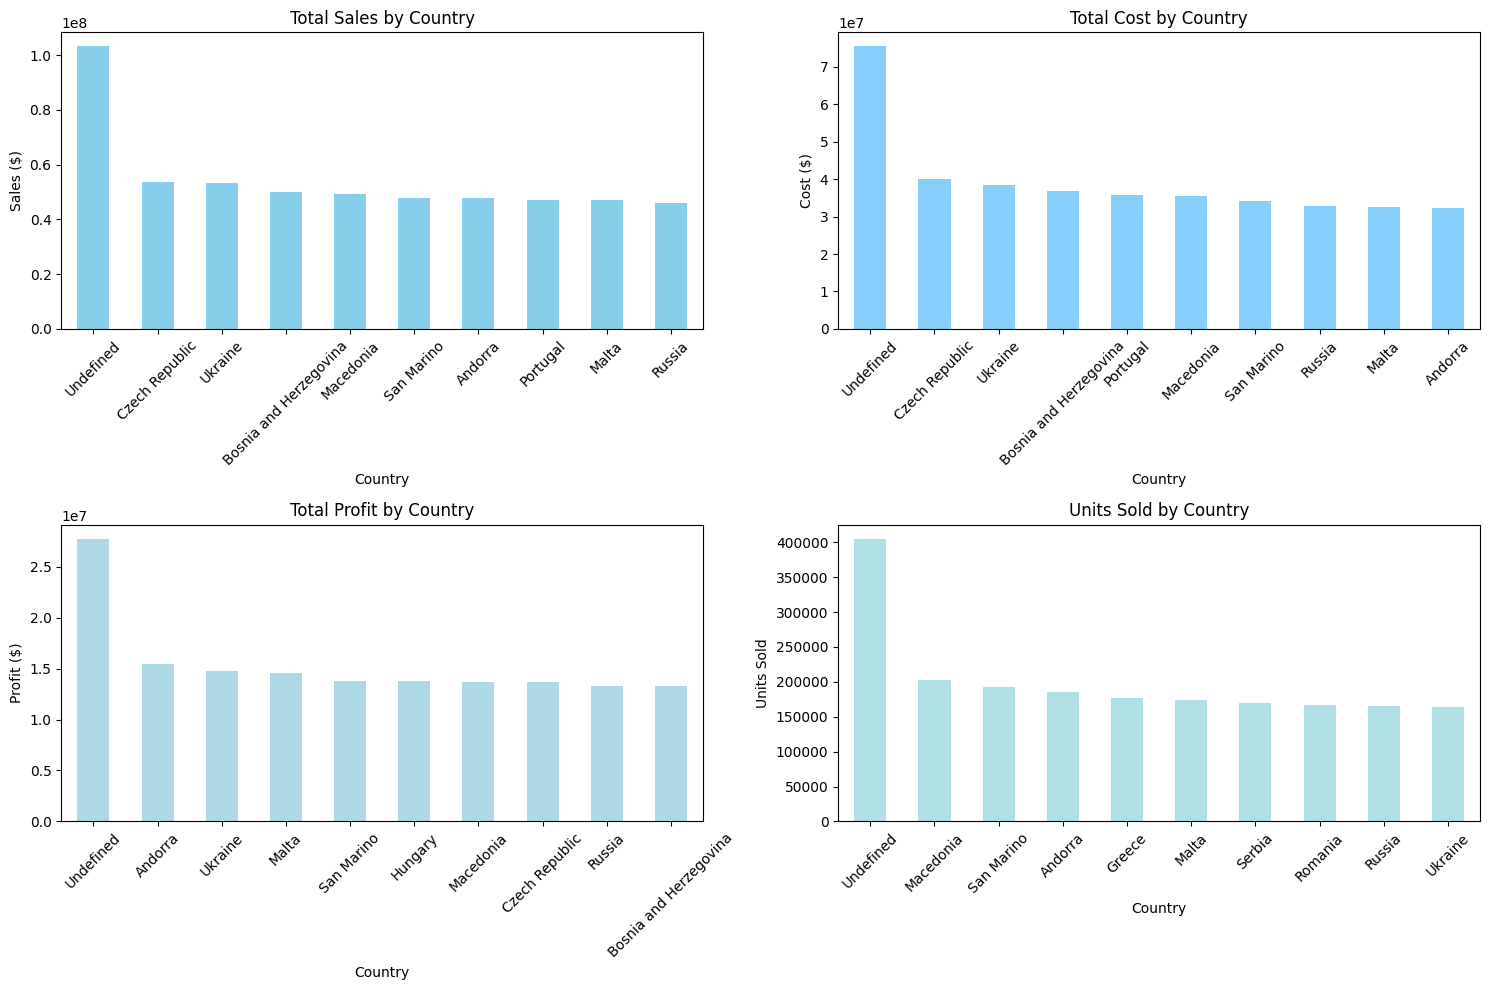

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

#Аналіз та візуалізація продажів за країнами
df.groupby("Country")["Sales"].sum().nlargest(10).sort_values(ascending=False).plot(kind="bar", ax=ax[0, 0], color="skyblue")
ax[0, 0].set_title("Total Sales by Country")
ax[0, 0].set_xlabel("Country")
ax[0, 0].set_ylabel("Sales ($)")
ax[0, 0].tick_params(axis="x", rotation=45)

#Аналіз та візуалізація витрат за країнами
df.groupby("Country")["Cost"].sum().nlargest(10).sort_values(ascending=False).plot(kind="bar", ax=ax[0, 1], color="lightskyblue")
ax[0, 1].set_title("Total Cost by Country")
ax[0, 1].set_xlabel("Country")
ax[0, 1].set_ylabel("Cost ($)")
ax[0, 1].tick_params(axis="x", rotation=45)

#Аналіз та візуалізація прибутку за країнами
df.groupby("Country")["Profit"].sum().nlargest(10).sort_values(ascending=False).plot(kind="bar", ax=ax[1, 0], color="lightblue")
ax[1, 0].set_title("Total Profit by Country")
ax[1, 0].set_xlabel("Country")
ax[1, 0].set_ylabel("Profit ($)")
ax[1, 0].tick_params(axis="x", rotation=45)

#Аналіз та візуалізація к-сть проданих товарів за країнами
df.groupby("Country")["Units Sold"].sum().nlargest(10).sort_values(ascending=False).plot(kind="bar", ax=ax[1, 1], color="powderblue")
ax[1, 1].set_title("Units Sold by Country")
ax[1, 1].set_xlabel("Country")
ax[1, 1].set_ylabel("Units Sold")
ax[1, 1].tick_params(axis="x", rotation=45)

plt.tight_layout()

plt.show()

###Аналіз продажів у розрізі регіонів



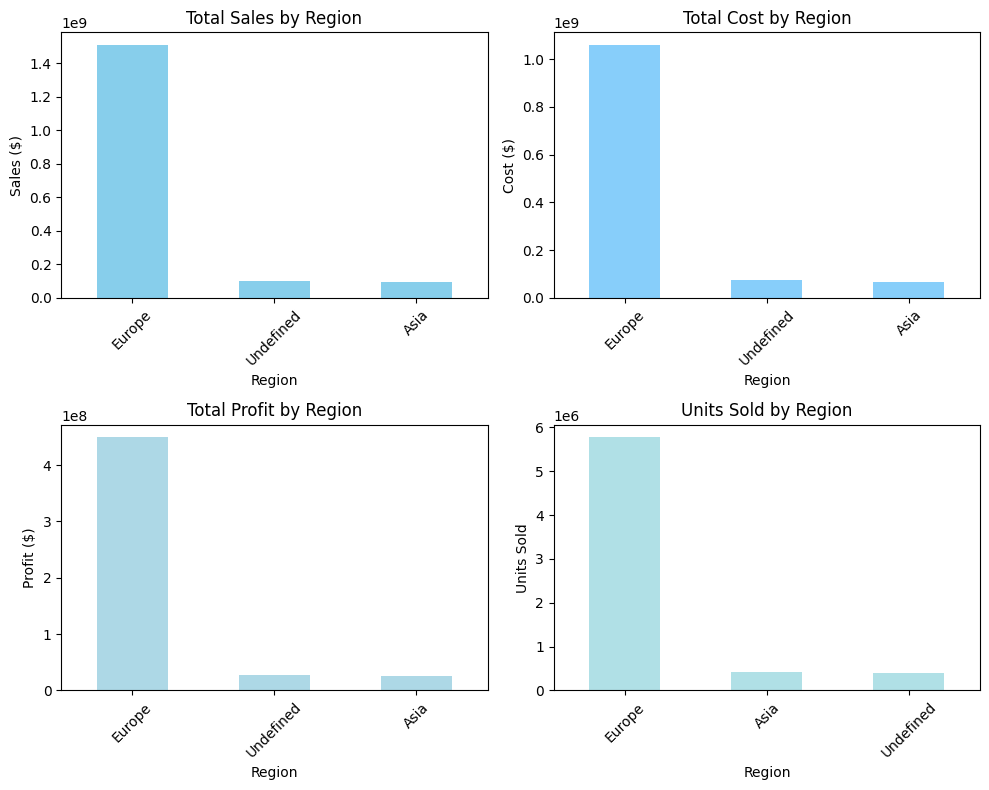

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

#Аналіз та візуалізація продажів за регіонами
df.groupby("Region")["Sales"].sum().sort_values(ascending=False).plot(kind="bar", ax=ax[0, 0], color="skyblue")
ax[0, 0].set_title("Total Sales by Region")
ax[0, 0].set_xlabel("Region")
ax[0, 0].set_ylabel("Sales ($)")
ax[0, 0].tick_params(axis="x", rotation=45)

#Аналіз та візуалізація витрат за регіонами
df.groupby("Region")["Cost"].sum().sort_values(ascending=False).plot(kind="bar", ax=ax[0, 1], color="lightskyblue")
ax[0, 1].set_title("Total Cost by Region")
ax[0, 1].set_xlabel("Region")
ax[0, 1].set_ylabel("Cost ($)")
ax[0, 1].tick_params(axis="x", rotation=45)

#Аналіз та візуалізація доходів за регіонами
df.groupby("Region")["Profit"].sum().sort_values(ascending=False).plot(kind="bar", ax=ax[1, 0], color="lightblue")
ax[1, 0].set_title("Total Profit by Region")
ax[1, 0].set_xlabel("Region")
ax[1, 0].set_ylabel("Profit ($)")
ax[1, 0].tick_params(axis="x", rotation=45)

#Аналіз та візуалізація к-сть проданих товарів за регіонами
df.groupby("Region")["Units Sold"].sum().sort_values(ascending=False).plot(kind="bar", ax=ax[1, 1], color="powderblue")
ax[1, 1].set_title("Units Sold by Region")
ax[1, 1].set_xlabel("Region")
ax[1, 1].set_ylabel("Units Sold")
ax[1, 1].tick_params(axis="x", rotation=45)

plt.tight_layout()

plt.show()

###Аналіз продажів у розрізі каналів продажу

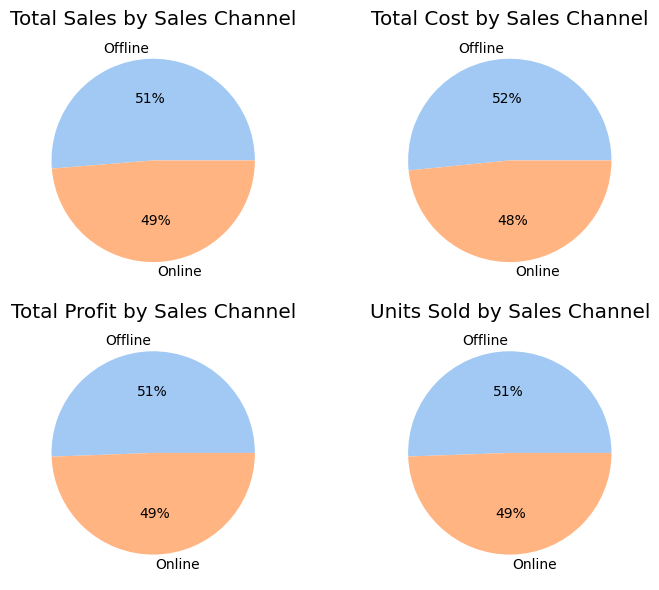

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(8, 6))
colors = sns.color_palette('pastel')

#Аналіз та візуалізація продажів за каналами продажу
df.groupby("Sales Channel")["Sales"].sum().plot(kind="pie", ax=ax[0, 0], colors=colors, autopct='%.0f%%')
ax[0, 0].set_title("Total Sales by Sales Channel")
ax[0, 0].set_ylabel("")
ax[0, 0].set_xlabel("")

#Аналіз та візуалізація витрат за каналами продажу
df.groupby("Sales Channel")["Cost"].sum().sort_values(ascending=False).plot(kind="pie", ax=ax[0, 1], colors=colors, autopct='%.0f%%')
ax[0, 1].set_title("Total Cost by Sales Channel")
ax[0, 1].set_ylabel("")
ax[0, 1].set_xlabel("")

#Аналіз та візуалізація доходів за каналами продажу
df.groupby("Sales Channel")["Profit"].sum().sort_values(ascending=False).plot(kind="pie", ax=ax[1, 0], colors=colors, autopct='%.0f%%')
ax[1, 0].set_title("Total Profit by Sales Channel")
ax[1, 0].set_ylabel("")
ax[1, 0].set_xlabel("")


#Аналіз та візуалізація к-сть проданих товарі за каналами продажу
df.groupby("Sales Channel")["Units Sold"].sum().sort_values(ascending=False).plot(kind="pie", ax=ax[1, 1], colors=colors, autopct='%.0f%%')
ax[1, 1].set_title("Units Sold by Sales Channel")
ax[1, 1].set_ylabel("")
ax[1, 1].set_xlabel("")

plt.tight_layout()

plt.show()

##Аналіз інтервалу часу між замовленням та його відвантаженням у різних розрізах

In [ ]:
#Розрахунок інтервалу часу між замовленням та його відвантаженням і створення відповідної колонки
df["Delivery Days"] = (df["Ship Date"] - df["Order Date"]).dt.days
mean_delivery_days = round((df["Delivery Days"].mean()), 0)

print(f"У середньому доставка триває {mean_delivery_days} днів")

У середньому доставка триває 25.0 днів


###Аналіз інтервалу часу між замовленням та його відвантаженням у розрізі категорій товарів

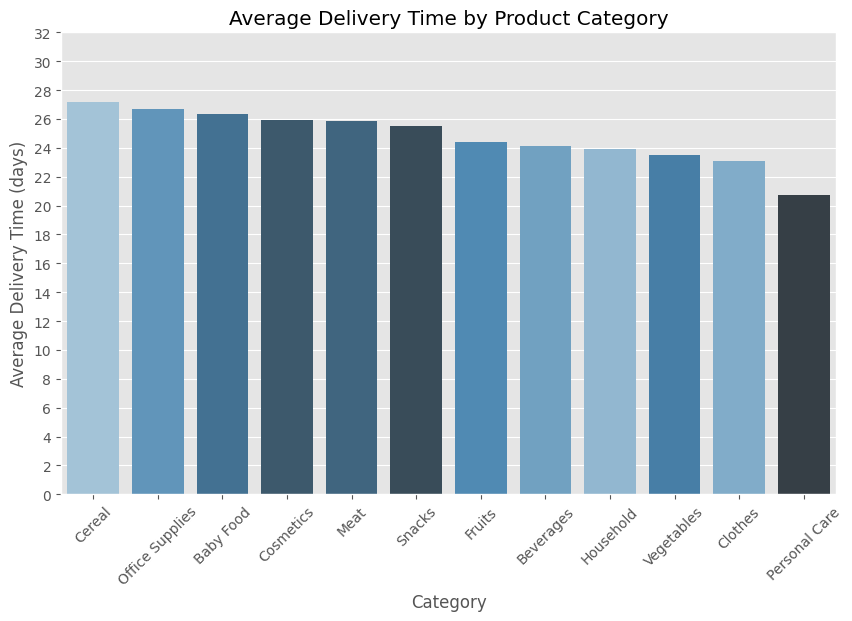

In [ ]:
#Аналіз та візуалізація cереднього інтервалу часу за категоріями товарів
plt.style.use("ggplot")
plt.figure(figsize=(10,6))

order_cat = df.groupby("Category")["Delivery Days"].mean().sort_values(ascending=False).index

bars = sns.barplot(data=df, x="Category", y="Delivery Days", hue="Category", estimator="mean", palette="Blues_d", errorbar=("ci", False), order=order_cat)
plt.title("Average Delivery Time by Product Category")
plt.xlabel("Category")
plt.ylabel("Average Delivery Time (days)")
plt.xticks(rotation=45)

y_ticks = np.arange(0, plt.gca().get_ylim()[1] + 5, 2)
plt.yticks(y_ticks)

plt.show()

###Аналіз інтервалу у розрізі країн

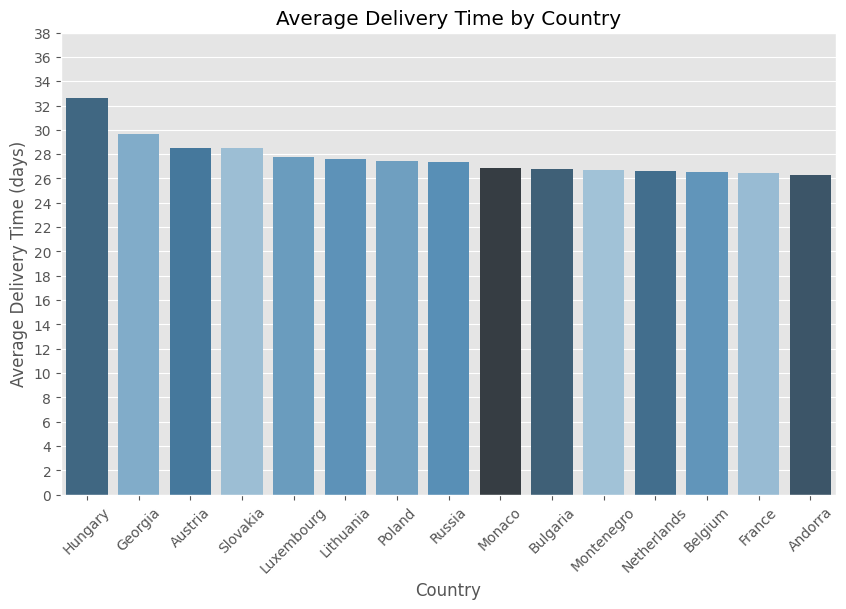

In [ ]:
#Аналіз та візуалізація cереднього інтервалу часу за країнами
plt.style.use("ggplot")
plt.figure(figsize=(10,6))

order_cat = df.groupby("Country")["Delivery Days"].mean().nlargest(15).sort_values(ascending=False).index

bars = sns.barplot(data=df, x="Country", y="Delivery Days", hue="Country", estimator="mean", palette="Blues_d", errorbar=("ci", False), order=order_cat)
plt.title("Average Delivery Time by Country")
plt.xlabel("Country")
plt.ylabel("Average Delivery Time (days)")
plt.xticks(rotation=45)

y_ticks = np.arange(0, plt.gca().get_ylim()[1] + 5, 2)
plt.yticks(y_ticks)

plt.show()

###Аналіз інтервалу у розрізі регіонів

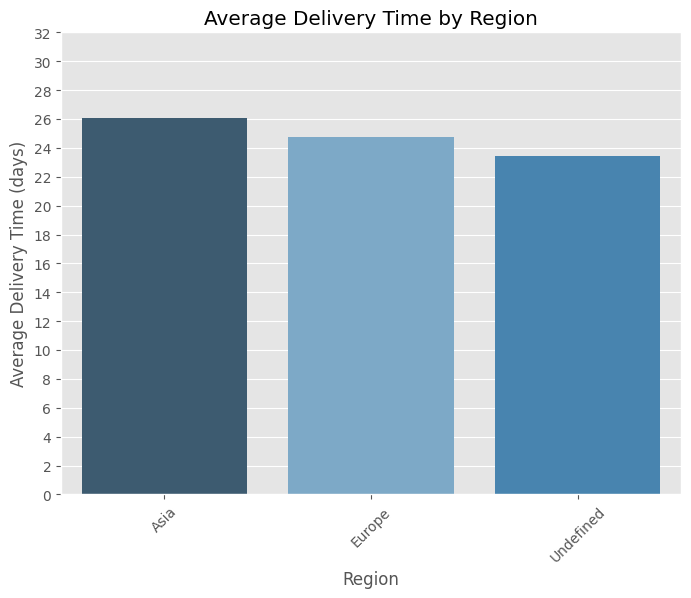

In [ ]:
#Аналіз та візуалізація cереднього інтервалу часу за регіонами
plt.style.use("ggplot")
plt.figure(figsize=(8,6))

order_cat = df.groupby("Region")["Delivery Days"].mean().nlargest(15).sort_values(ascending=False).index

bars = sns.barplot(data=df, x="Region", y="Delivery Days", hue="Region", estimator="mean", palette="Blues_d", errorbar=("ci", False), order=order_cat)
plt.title("Average Delivery Time by Region")
plt.xlabel("Region")
plt.ylabel("Average Delivery Time (days)")
plt.xticks(rotation=45)

y_ticks = np.arange(0, plt.gca().get_ylim()[1] + 5, 2)
plt.yticks(y_ticks)

plt.show()

##Аналіз залежності прибутку від часу, необхідного на відвантаження товару

In [ ]:
#Групування, створення бінів (інтервалів) для аналізу
profit_by_days = df.groupby("Delivery Days")["Profit"].agg(["mean", "median", "count", "sum"]).reset_index()

bins = [0, 1, 3, 7, 14, df["Delivery Days"].max()]
labels = ["0-1", "2-3", "4-7", "8-14", "15+"]

df["Delivery_Bin"] = pd.cut(df["Delivery Days"], bins=bins, labels=labels, include_lowest=True)
profit_by_bins = df.groupby("Delivery_Bin")["Profit"].agg(["mean", "median", "count"]).reset_index()


NameError: name 'df' is not defined

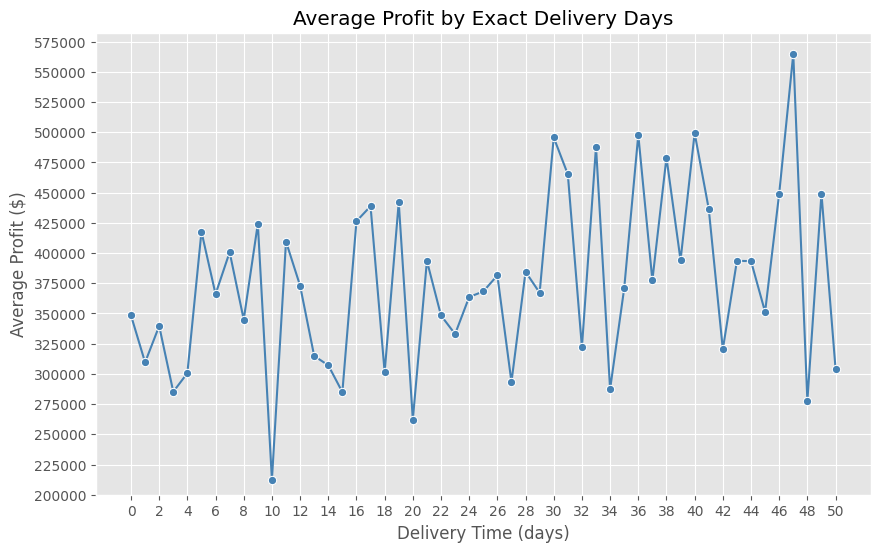

In [ ]:
#Візуалізація залежності середнього прибутку від інтервалу
plt.figure(figsize=(10,6))
sns.lineplot(data=profit_by_days, x="Delivery Days", y="mean", marker="o", color="steelblue")
plt.title("Average Profit by Exact Delivery Days")
plt.xlabel("Delivery Time (days)")
plt.ylabel("Average Profit ($)")

x_ticks = np.arange(0, profit_by_days["Delivery Days"].max() + 2, 2)
plt.xticks(x_ticks)

y_min = 200000
y_max = plt.gca().get_ylim()[1] + 5
y_ticks = np.arange(y_min, y_max, 25000)
plt.yticks(y_ticks)
plt.ylim(y_min, y_max)

plt.show()

/tmp/ipython-input-709036056.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Delivery_Bin")["Profit"].mean().sort_values(ascending=False).plot(kind="bar", ax=ax[0], color="skyblue")
/tmp/ipython-input-709036056.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Delivery_Bin")["Profit"].median().sort_values(ascending=False).plot(kind="bar", ax=ax[1], color="skyblue")


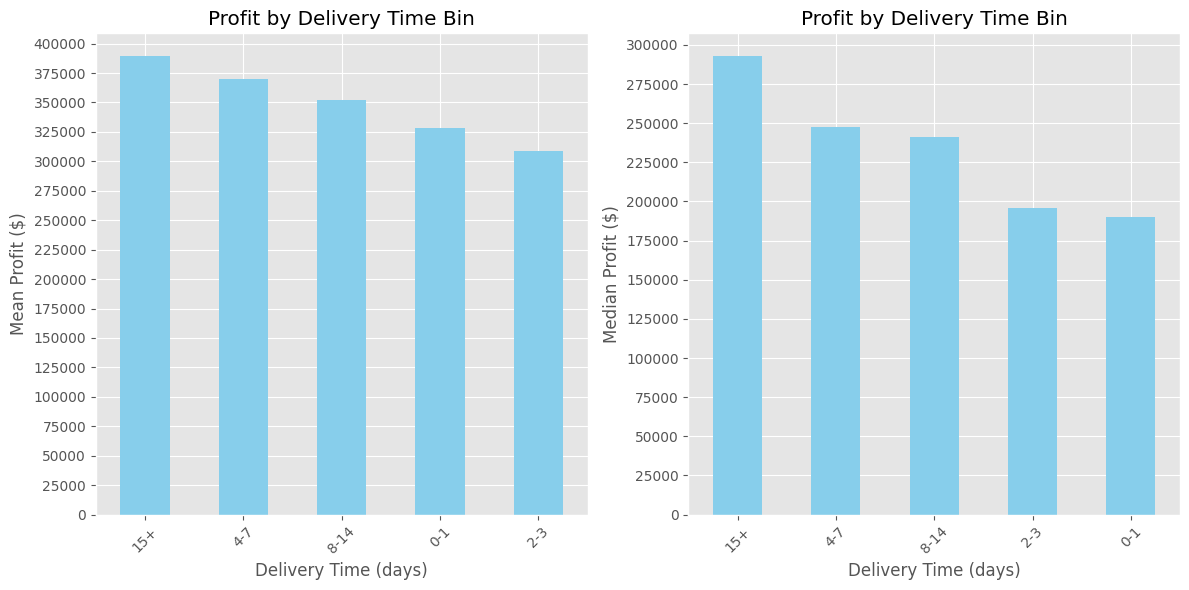

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

#Аналіз та візуалізація продажів за регіонами
df.groupby("Delivery_Bin")["Profit"].mean().sort_values(ascending=False).plot(kind="bar", ax=ax[0], color="skyblue")
ax[0].set_title("Profit by Delivery Time Bin")
ax[0].set_xlabel("Delivery Time (days)")
ax[0].set_ylabel("Mean Profit ($)")
ax[0].tick_params(axis="x", rotation=45)

y_ticks = np.arange(0, ax[0].get_ylim()[1] + 5, 25000)
ax[0].set_yticks(y_ticks)

#Аналіз та візуалізація витрат за регіонами
df.groupby("Delivery_Bin")["Profit"].median().sort_values(ascending=False).plot(kind="bar", ax=ax[1], color="skyblue")
ax[1].set_title("Profit by Delivery Time Bin")
ax[1].set_xlabel("Delivery Time (days)")
ax[1].set_ylabel("Median Profit ($)")
ax[1].tick_params(axis="x", rotation=45)

y_ticks = np.arange(0, ax[1].get_ylim()[1] + 5, 25000)
ax[1].set_yticks(y_ticks)

plt.tight_layout()
plt.show()

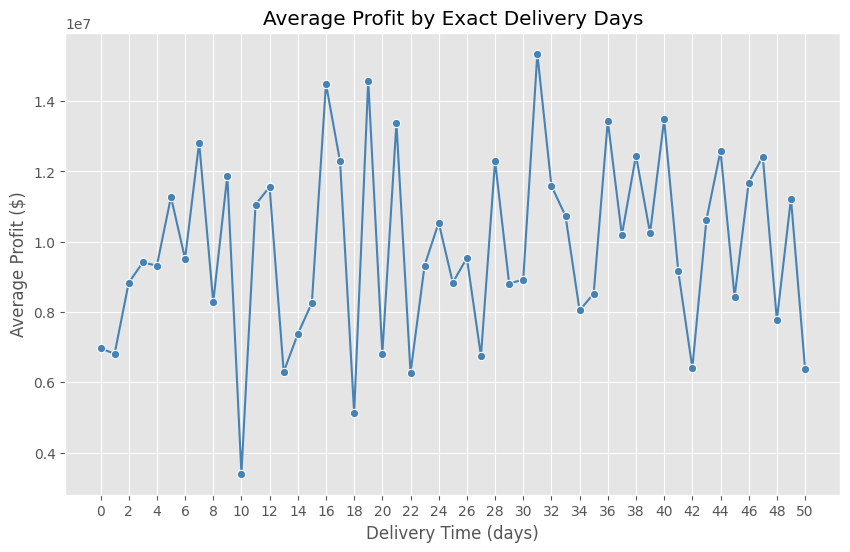

In [ ]:
#Візуалізація залежності суми прибутку від інтервалу
plt.figure(figsize=(10,6))
sns.lineplot(data=profit_by_days, x="Delivery Days", y="sum", marker="o", color="steelblue")
plt.title("Average Profit by Exact Delivery Days")
plt.xlabel("Delivery Time (days)")
plt.ylabel("Average Profit ($)")

x_ticks = np.arange(0, profit_by_days["Delivery Days"].max() + 2, 2)
plt.xticks(x_ticks)

plt.show()

##Динаміка продажів (у часі) у різних розрізах

In [ ]:
#Стоворення нових колонок з місяцем та роком замовлення та перетворення їх у потрібний формат
df["Month"] = pd.to_datetime(df["Order Date"]).dt.month
df["Year"] = pd.to_datetime(df["Order Date"]).dt.year

###Загальна динаміка продажів (у часі)

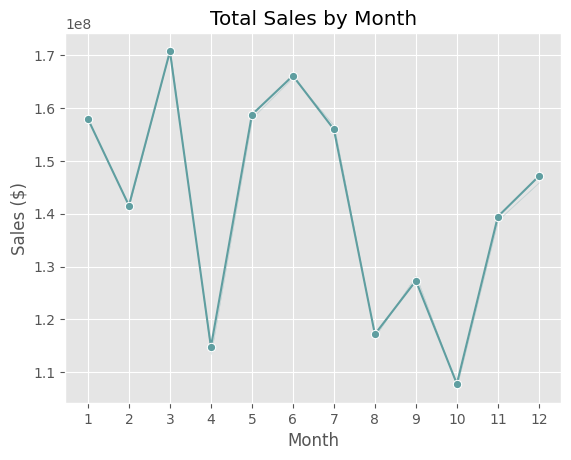

In [ ]:
#Загальна динаміка продажів у розрізі місяців
sns.lineplot(data=df, x="Month",
             y="Sales",
             estimator="sum",
             errorbar=('ci', False),
             marker="o",
             color="cadetblue")
x_ticks = np.arange(1, df["Month"].max()+1, 1)
plt.xticks(x_ticks)

plt.title("Total Sales by Month")
plt.xlabel("Month")
plt.ylabel("Sales ($)")

plt.show()

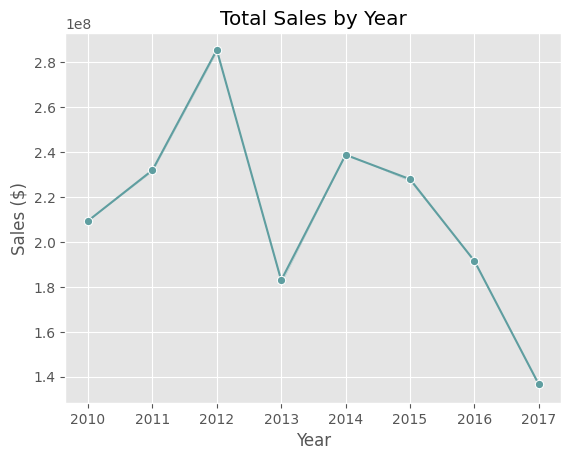

In [ ]:
#Загальна динаміка продажів у розрізі років
sns.lineplot(data=df, x="Year",
             y="Sales",
             estimator="sum",
             errorbar=('ci', False),
             marker="o",
             color="cadetblue")
min_year = min(df["Year"])
x_ticks = np.arange(min_year, df["Year"].max()+1, 1)
plt.xticks(x_ticks)

plt.title("Total Sales by Year")
plt.xlabel("Year")
plt.ylabel("Sales ($)")

plt.show()

###Динаміка продажів (у часі) у розрізі категорій

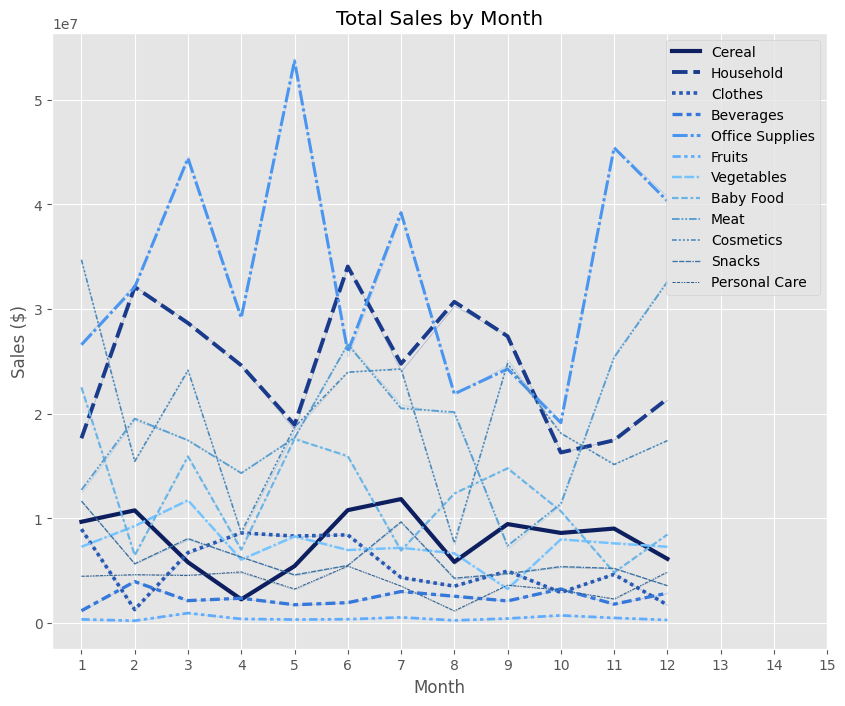

In [ ]:
#Динаміка продажів у розрізі місяців за категоріями (загальний графік для наочності)
plt.figure(figsize=(10, 8))
palette_blue_on_gray = ["#0d1f5f","#1a3b8c","#2859b3","#3678d9","#4a95ef","#5facff","#74c3ff","#6bb5e6","#599fd1","#4a89bb","#3b73a5","#2c5d8f"]
sns.lineplot(data=df, x="Month",
             y="Sales",
             estimator="sum",
             hue="Category",
             errorbar=('ci', False),
             size="Category",
             style="Category",
             palette=palette_blue_on_gray)

x_ticks = np.arange(1, df["Month"].max()+4, 1)
plt.xticks(x_ticks)

plt.title("Total Sales by Month")
plt.xlabel("Month")
plt.ylabel("Sales ($)")
plt.legend(loc="upper right")

plt.show()

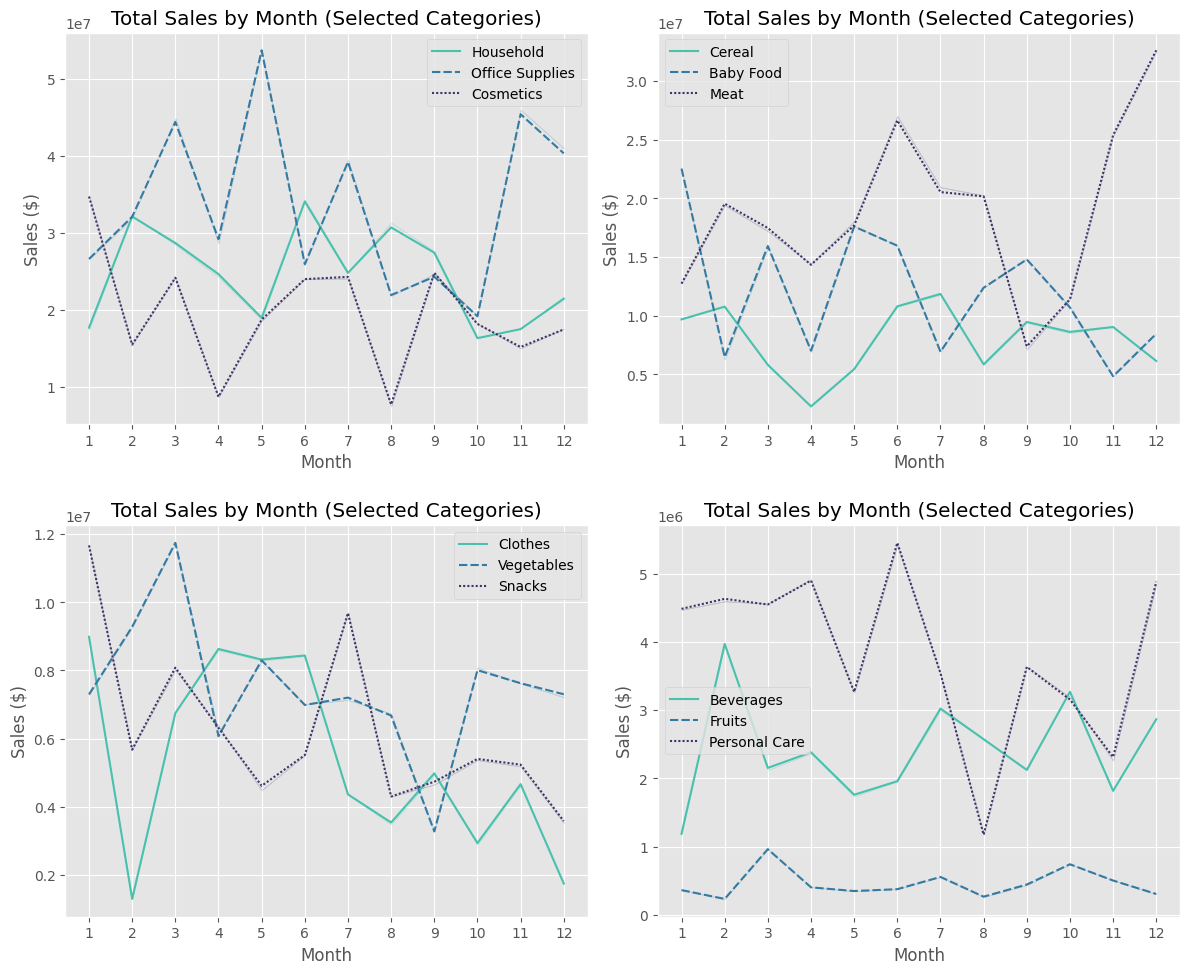

In [ ]:
#Динаміка продажів у розрізі місяців за категоріями (у кількох графіках, по три категорії в кожному для детальнішого аналізу)
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# First subplot
categories_to_plot1 = ["Office Supplies", "Household", "Cosmetics"]
df_filtered1 = df[df['Category'].isin(categories_to_plot1)]
palette = sns.color_palette("mako_r", len(categories_to_plot1))

sns.lineplot(
    data=df_filtered1,
    x="Month",
    y="Sales",
    estimator="sum",
    hue="Category",
    errorbar=('ci', False),
    style="Category",
    palette=palette,
    ax=ax[0, 0]
)
ax[0, 0].set_title("Total Sales by Month (Selected Categories)")
ax[0, 0].set_xlabel("Month")
ax[0, 0].set_ylabel("Sales ($)")
x_ticks = np.arange(1, df["Month"].max()+1, 1)
ax[0, 0].set_xticks(x_ticks)
ax[0, 0].legend(loc='best')

# Second subplot
categories_to_plot2 = ["Meat", "Baby Food", "Cereal"]
df_filtered2 = df[df['Category'].isin(categories_to_plot2)]
palette = sns.color_palette("mako_r", len(categories_to_plot2))

sns.lineplot(
    data=df_filtered2,
    x="Month",
    y="Sales",
    estimator="sum",
    hue="Category",
    errorbar=('ci', False),
    style="Category",
    palette=palette,
    ax=ax[0, 1]
)
ax[0, 1].set_title("Total Sales by Month (Selected Categories)")
ax[0, 1].set_xlabel("Month")
ax[0, 1].set_ylabel("Sales ($)")
x_ticks = np.arange(1, df["Month"].max()+1, 1)
ax[0, 1].set_xticks(x_ticks)
ax[0, 1].legend(loc='best')

# Third subplot
categories_to_plot3 = ["Vegetables", "Snacks", "Clothes"]
df_filtered3 = df[df['Category'].isin(categories_to_plot3)]
palette = sns.color_palette("mako_r", len(categories_to_plot3))

sns.lineplot(
    data=df_filtered3,
    x="Month",
    y="Sales",
    estimator="sum",
    hue="Category",
    errorbar=('ci', False),
    style="Category",
    palette=palette,
    ax=ax[1, 0]
)
ax[1, 0].set_title("Total Sales by Month (Selected Categories)")
ax[1, 0].set_xlabel("Month")
ax[1, 0].set_ylabel("Sales ($)")
x_ticks = np.arange(1, df["Month"].max()+1, 1)
ax[1, 0].set_xticks(x_ticks)
ax[1, 0].legend(loc='best')

# Fourth subplot
categories_to_plot4 = ["Personal Care", "Beverages", "Fruits"]
df_filtered4 = df[df['Category'].isin(categories_to_plot4)]
palette = sns.color_palette("mako_r", len(categories_to_plot4))

sns.lineplot(
    data=df_filtered4,
    x="Month",
    y="Sales",
    estimator="sum",
    hue="Category",
    errorbar=('ci', False),
    style="Category",
    palette=palette,
    ax=ax[1, 1]
)
ax[1, 1].set_title("Total Sales by Month (Selected Categories)")
ax[1, 1].set_xlabel("Month")
ax[1, 1].set_ylabel("Sales ($)")
x_ticks = np.arange(1, df["Month"].max()+1, 1)
ax[1, 1].set_xticks(x_ticks)
ax[1, 1].legend(loc='best')

plt.tight_layout()
plt.show()

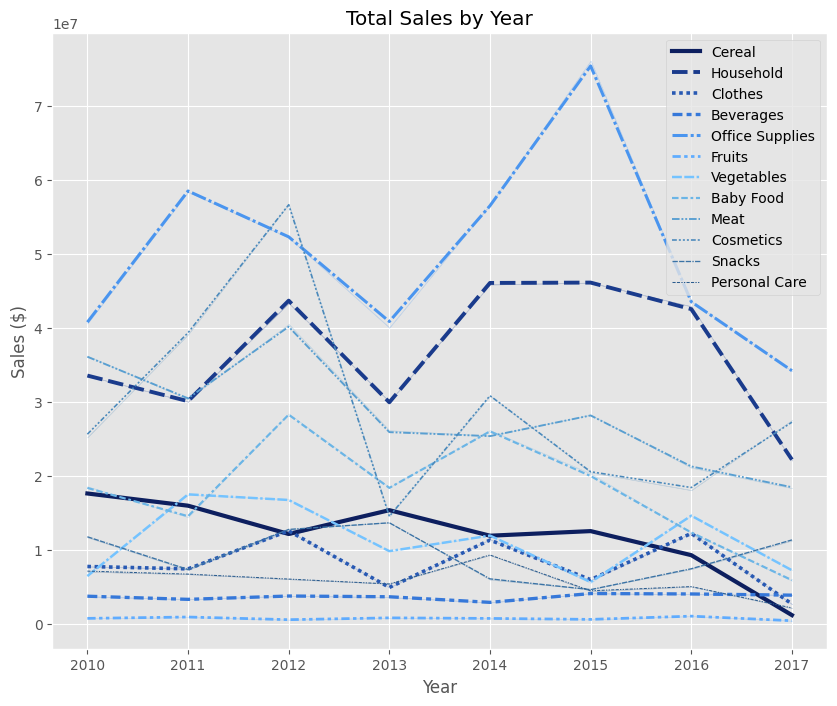

In [ ]:
#Динаміка продажів у розрізі років за категоріями (загальний графік для наочності)
plt.figure(figsize=(10, 8))
palette_blue_on_gray = ["#0d1f5f","#1a3b8c","#2859b3","#3678d9","#4a95ef","#5facff","#74c3ff","#6bb5e6","#599fd1","#4a89bb","#3b73a5","#2c5d8f"]
sns.lineplot(data=df, x="Year",
             y="Sales",
             estimator="sum",
             hue="Category",
             errorbar=('ci', False),
             size="Category",
             style="Category",
             palette=palette_blue_on_gray)

plt.title("Total Sales by Year")
plt.xlabel("Year")
plt.ylabel("Sales ($)")
plt.legend(loc="upper right")

plt.show()

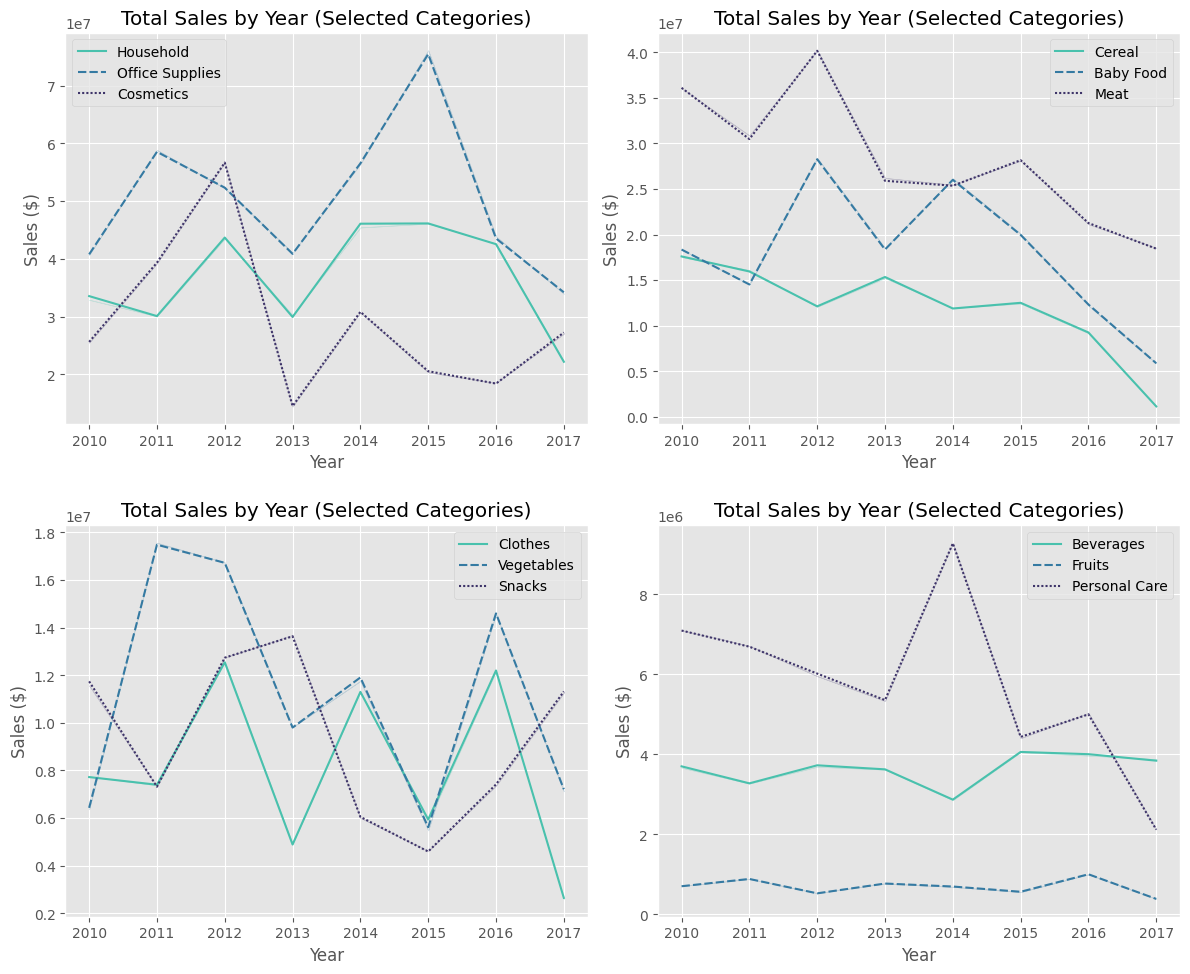

In [ ]:
#Динаміка продажів у розрізі років за категоріями (у кількох графіках, по три категорії в кожному для детальнішого аналізу)
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# First subplot
categories_to_plot1 = ["Office Supplies", "Household", "Cosmetics"]
df_filtered1 = df[df['Category'].isin(categories_to_plot1)]
palette = sns.color_palette("mako_r", len(categories_to_plot1))

sns.lineplot(
    data=df_filtered1,
    x="Year",
    y="Sales",
    estimator="sum",
    hue="Category",
    errorbar=('ci', False),
    style="Category",
    palette=palette,
    ax=ax[0, 0]
)
ax[0, 0].set_title("Total Sales by Year (Selected Categories)")
ax[0, 0].set_xlabel("Year")
ax[0, 0].set_ylabel("Sales ($)")
ax[0, 0].legend(loc='best')

# Second subplot
categories_to_plot2 = ["Meat", "Baby Food", "Cereal"]
df_filtered2 = df[df['Category'].isin(categories_to_plot2)]
palette = sns.color_palette("mako_r", len(categories_to_plot2))

sns.lineplot(
    data=df_filtered2,
    x="Year",
    y="Sales",
    estimator="sum",
    hue="Category",
    errorbar=('ci', False),
    style="Category",
    palette=palette,
    ax=ax[0, 1]
)
ax[0, 1].set_title("Total Sales by Year (Selected Categories)")
ax[0, 1].set_xlabel("Year")
ax[0, 1].set_ylabel("Sales ($)")
ax[0, 1].legend(loc='best')

# Third subplot
categories_to_plot3 = ["Vegetables", "Snacks", "Clothes"]
df_filtered3 = df[df['Category'].isin(categories_to_plot3)]
palette = sns.color_palette("mako_r", len(categories_to_plot3))

sns.lineplot(
    data=df_filtered3,
    x="Year",
    y="Sales",
    estimator="sum",
    hue="Category",
    errorbar=('ci', False),
    style="Category",
    palette=palette,
    ax=ax[1, 0]
)
ax[1, 0].set_title("Total Sales by Year (Selected Categories)")
ax[1, 0].set_xlabel("Year")
ax[1, 0].set_ylabel("Sales ($)")
ax[1, 0].legend(loc='best')

# Fourth subplot
categories_to_plot4 = ["Personal Care", "Beverages", "Fruits"]
df_filtered4 = df[df['Category'].isin(categories_to_plot4)]
palette = sns.color_palette("mako_r", len(categories_to_plot4))

sns.lineplot(
    data=df_filtered4,
    x="Year",
    y="Sales",
    estimator="sum",
    hue="Category",
    errorbar=('ci', False),
    style="Category",
    palette=palette,
    ax=ax[1, 1]
)
ax[1, 1].set_title("Total Sales by Year (Selected Categories)")
ax[1, 1].set_xlabel("Year")
ax[1, 1].set_ylabel("Sales ($)")
ax[1, 1].legend(loc='best')

plt.tight_layout()
plt.show()

###Динаміка продажів (у часі) у розрізі топ-5 країн

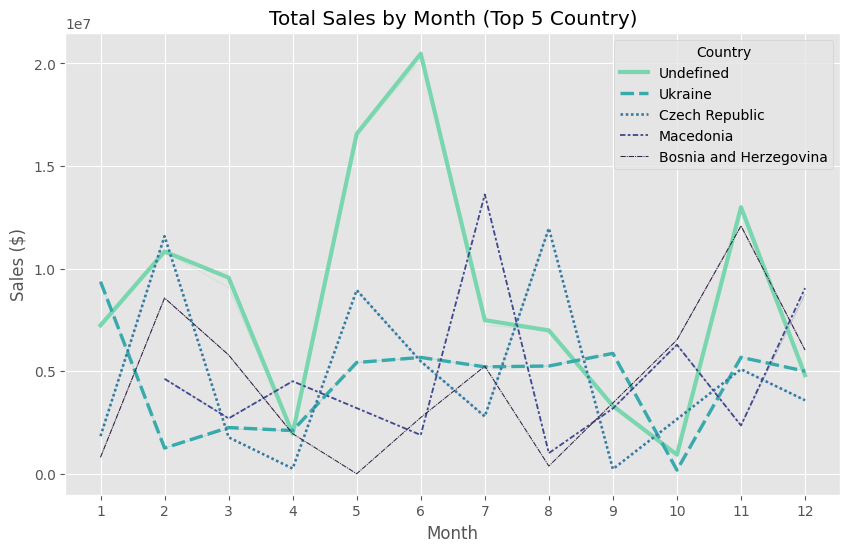

In [ ]:
#Динаміка продажів у розрізі місяців за країнами (топ-5)
plt.figure(figsize=(10,6))
top_counties = df.groupby("Country")["Sales"].sum().nlargest(5).index.tolist()

df_filtered = df[df["Country"].isin(top_counties)]

palette = sns.color_palette("mako_r", len(top_counties))

sns.lineplot(
    data=df_filtered,
    x="Month",
    y="Sales",
    estimator="sum",
    hue="Country",
    errorbar=('ci', False),
    size="Country",
    style="Country",
    palette=palette
)

x_ticks = np.arange(1, df["Month"].max()+1, 1)
plt.xticks(x_ticks)

plt.title("Total Sales by Month (Top 5 Country)")
plt.xlabel("Month")
plt.ylabel("Sales ($)")
plt.show()

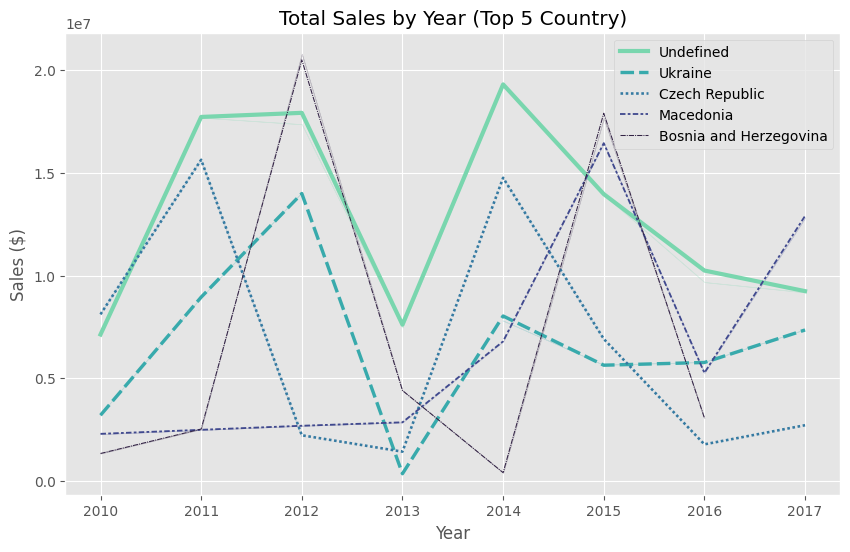

In [ ]:
#Динаміка продажів у розрізі років за країнами (топ-5)
plt.figure(figsize=(10,6))
top_counties = df.groupby("Country")["Sales"].sum().nlargest(5).index.tolist()

df_filtered = df[df["Country"].isin(top_counties)]

palette = sns.color_palette("mako_r", len(top_counties))

sns.lineplot(
    data=df_filtered,
    x="Year",
    y="Sales",
    estimator="sum",
    hue="Country",
    errorbar=('ci', False),
    size="Country",
    style="Country",
    palette=palette
)

plt.title("Total Sales by Year (Top 5 Country)")
plt.xlabel("Year")
plt.ylabel("Sales ($)")
plt.legend(loc="best")
plt.show()

###Динаміка продажів (у часі) у розрізі регіонів

/tmp/ipython-input-1474206364.py:6: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(


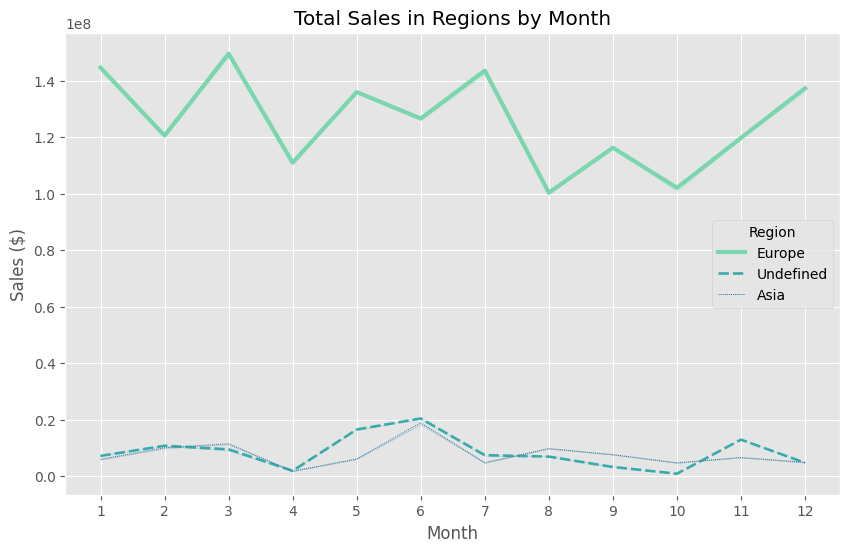

In [ ]:
#Динаміка продажів у розрізі місяців за регіонами
plt.figure(figsize=(10,6))

palette = sns.color_palette("mako_r", len(top_counties))

sns.lineplot(
    data=df,
    x="Month",
    y="Sales",
    estimator="sum",
    hue="Region",
    errorbar=('ci', False),
    size="Region",
    style="Region",
    palette=palette
)

x_ticks = np.arange(1, df["Month"].max()+1, 1)
plt.xticks(x_ticks)

plt.title("Total Sales in Regions by Month")
plt.xlabel("Month")
plt.ylabel("Sales ($)")
plt.show()

/tmp/ipython-input-3795698218.py:6: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(


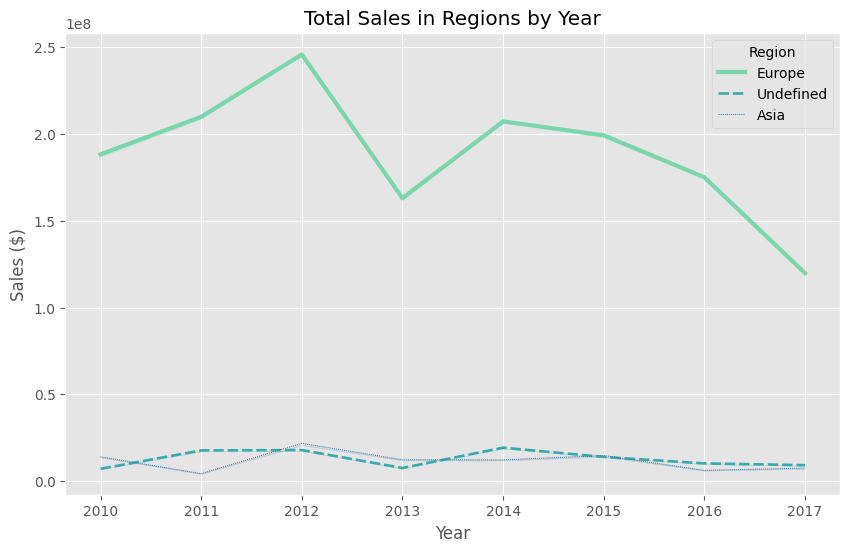

In [ ]:
#Динаміка продажів у розрізі років за регіонами
plt.figure(figsize=(10,6))

palette = sns.color_palette("mako_r", len(top_counties))

sns.lineplot(
    data=df,
    x="Year",
    y="Sales",
    estimator="sum",
    hue="Region",
    errorbar=('ci', False),
    size="Region",
    style="Region",
    palette=palette
)

plt.title("Total Sales in Regions by Year")
plt.xlabel("Year")
plt.ylabel("Sales ($)")
plt.show()

##Аналіз продажів товарів за днями тижня

In [ ]:
#Стоворення нової колонки з назвами днів тижня
df["Order Day Name"] = df["Order Date"].dt.day_name()

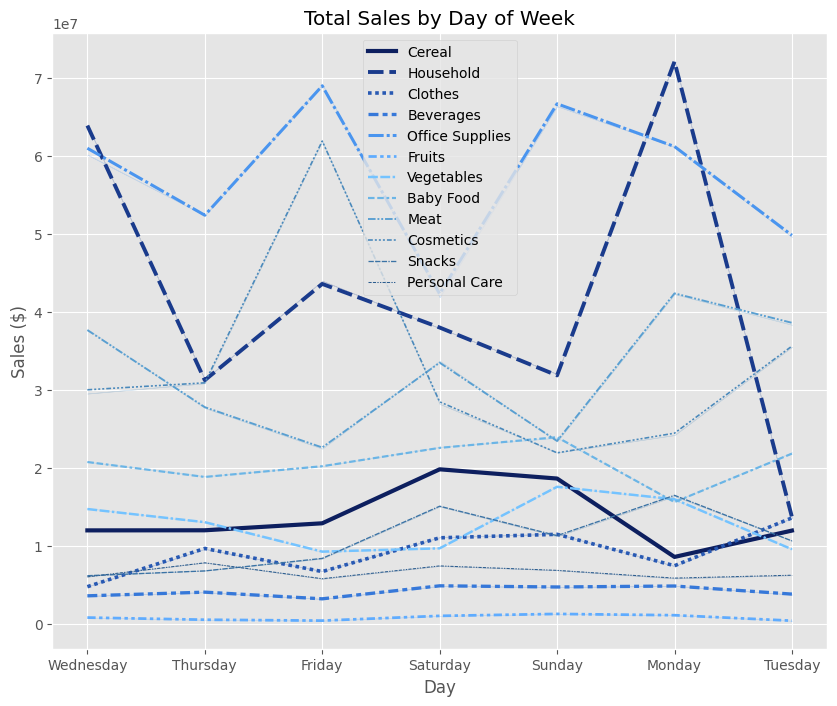

In [ ]:
#Аналіз продажів у розрізі днів тижня за категоріями (загальний графік для наочності)
plt.figure(figsize=(10, 8))
palette_blue_on_gray = ["#0d1f5f","#1a3b8c","#2859b3","#3678d9","#4a95ef","#5facff","#74c3ff","#6bb5e6","#599fd1","#4a89bb","#3b73a5","#2c5d8f"]
sns.lineplot(data=df, x="Order Day Name",
             y="Sales",
             estimator="sum",
             hue="Category",
             errorbar=('ci', False),
             size="Category",
             style="Category",
             palette=palette_blue_on_gray)

plt.title("Total Sales by Day of Week")
plt.xlabel("Day")
plt.ylabel("Sales ($)")
plt.legend(loc="best")

plt.show()

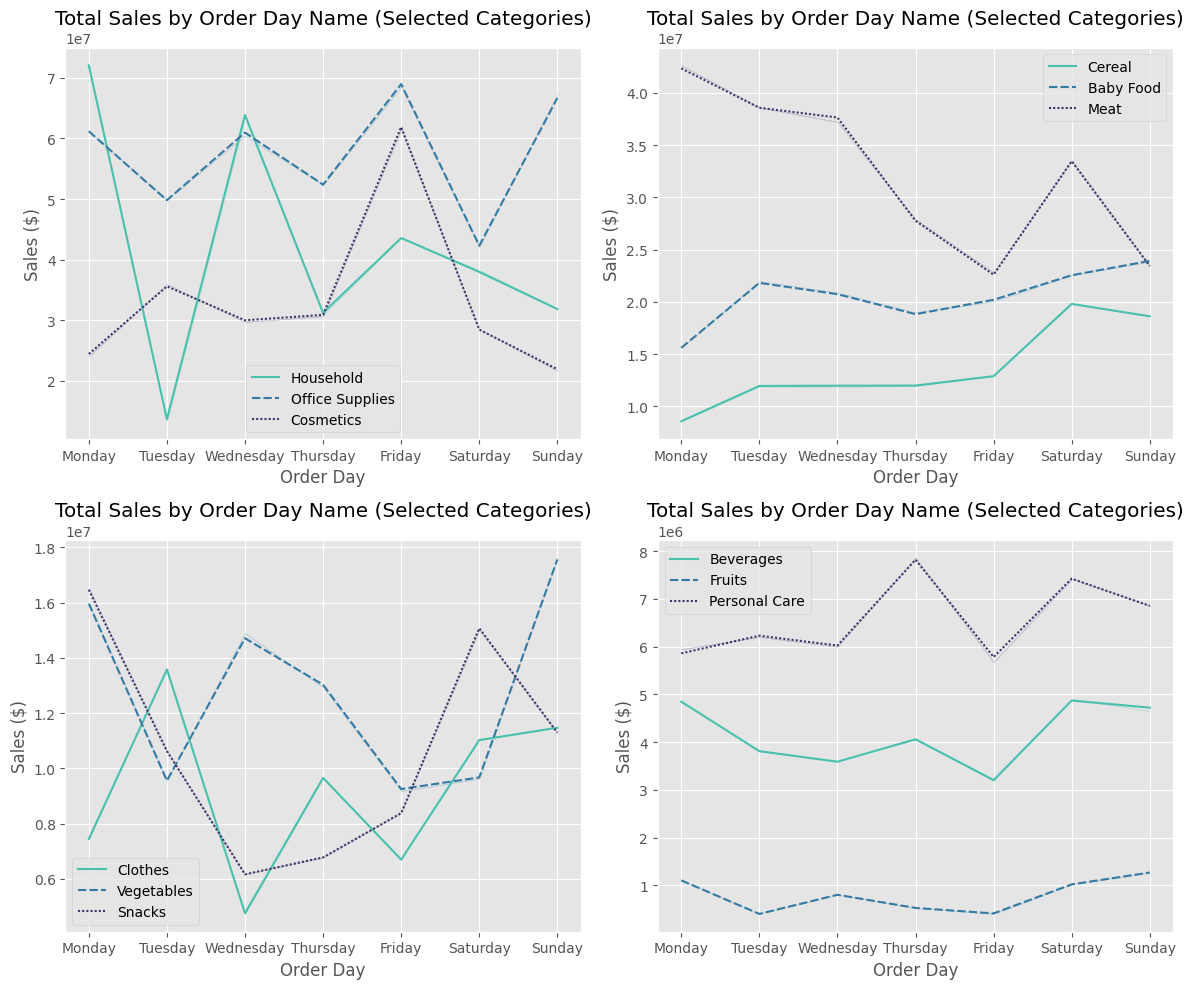

In [ ]:
#Аналіз продажів у розрізі днів тижня за категоріями (детільні візуалізації по 3 категорії/графік для наочності)
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["Order Day Name"] = pd.Categorical(df["Order Day Name"], categories=order, ordered=True)

# First subplot
categories_to_plot1 = ["Office Supplies", "Household", "Cosmetics"]
df_filtered1 = df[df['Category'].isin(categories_to_plot1)]
palette = sns.color_palette("mako_r", len(categories_to_plot1))

sns.lineplot(
    data=df_filtered1,
    x="Order Day Name",
    y="Sales",
    estimator="sum",
    hue="Category",
    errorbar=('ci', False),
    style="Category",
    palette=palette,
    ax=ax[0, 0]
)
ax[0, 0].set_title("Total Sales by Order Day Name (Selected Categories)")
ax[0, 0].set_xlabel("Order Day")
ax[0, 0].set_ylabel("Sales ($)")
ax[0, 0].legend(loc='best')

# Second subplot
categories_to_plot2 = ["Meat", "Baby Food", "Cereal"]
df_filtered2 = df[df['Category'].isin(categories_to_plot2)]
palette = sns.color_palette("mako_r", len(categories_to_plot2))

sns.lineplot(
    data=df_filtered2,
    x="Order Day Name",
    y="Sales",
    hue="Category",
    style="Category",
    palette=palette,
    estimator="sum",
    errorbar=('ci', False),
    ax=ax[0, 1]
)
ax[0, 1].set_title("Total Sales by Order Day Name (Selected Categories)")
ax[0, 1].set_xlabel("Order Day")
ax[0, 1].set_ylabel("Sales ($)")
ax[0, 1].legend(loc='best')

# Third subplot
categories_to_plot3 = ["Vegetables", "Snacks", "Clothes"]
df_filtered3 = df[df['Category'].isin(categories_to_plot3)]
palette = sns.color_palette("mako_r", len(categories_to_plot3))

sns.lineplot(
    data=df_filtered3,
    x="Order Day Name",
    y="Sales",
    estimator="sum",
    hue="Category",
    errorbar=('ci', False),
    style="Category",
    palette=palette,
    ax=ax[1, 0]
)
ax[1, 0].set_title("Total Sales by Order Day Name (Selected Categories)")
ax[1, 0].set_xlabel("Order Day")
ax[1, 0].set_ylabel("Sales ($)")
ax[1, 0].legend(loc='best')

# Fourth subplot
categories_to_plot4 = ["Personal Care", "Beverages", "Fruits"]
df_filtered4 = df[df['Category'].isin(categories_to_plot4)]
palette = sns.color_palette("mako_r", len(categories_to_plot4))

sns.lineplot(
    data=df_filtered4,
    x="Order Day Name",
    y="Sales",
    estimator="sum",
    hue="Category",
    errorbar=('ci', False),
    style="Category",
    palette=palette,
    ax=ax[1, 1]
)
ax[1, 1].set_title("Total Sales by Order Day Name (Selected Categories)")
ax[1, 1].set_xlabel("Order Day")
ax[1, 1].set_ylabel("Sales ($)")
ax[1, 1].legend(loc='best')

plt.tight_layout()
plt.show()

З графіків вище бачимо, що більгість катншоірій можна вважати сезонними. Оскільки всі вони мають зрости і спадки залежності від дня тижня. Тільки одну категорію можна вважати "постійною" - **Fruits**. З графіків видно, що к-сть продажів у цій категорії є на одному рівні, але у порівняні з іншими категоріями Fruits не є дуже прибутковою

#Reporting

##Вступ

###Мета аналізу

У цьому скорошиті зроблено детальний аналіз продажів продукції компанії, яка працює на світовому ринку і продає товари у звичайних магазинах та інтернет-магазинах.

**Основна мета аналізу** — очищення даних та проведення їх аналізу; знаходження цінних інсайтів діяльності компанії.

###Джерела даних

Датасет складається з **трьох** таблиць:

* events.csv — продажі за декілька років
* products.csv — категорії товарів та їх коди
* countries.csv — країни, регіони та їх коди

Їх було поєднано в один датасет до "основної" таблиці з продажами за декілька років.

Країни, регіони та їх коди - приєднано до таблиці з продажами за спільною колонкою кодів країн.

Категорії товарів - приєднано до таблиці з продажами за спільною колонкою id продуктів.

##Опис даних після підготовки

У процесі перевірки і очищення даних виявилося, що у таблиці були відсутні код та регіон для однієї країни. Цей рядок було усунено.

У таблиці продажів були відсутні досить таки багато значень з кодом країни. Тому було прийнято рішення про заповення пропущених значень як "Undefined", щоб не втрачати цінних даних для аналізу цілісної картини.

У таблиці з категоріями продуктів - пропущених значень не було.

У таблицях також не було дублікатів чи повторень.

У колонці Sales Channels були проблеми у написанні слів (одинакові слова починалися з різних за величиною букв, що створювало проблеми при аналізі), але проблему було вирішено замінивши всі перші букви слів на великі.

##Ключові бізнес-метрики

* Загальна кількість замовлень: 1330
* Загальний дохід: 1704623436.08 $

* Загальний прибуток: 501841827.12 $

* Загальні витрати: 1202781608.96 $
* Рентабельність магазину: 29.44%
* Кількість країн, що охоплені: 46 (у тому числі категорія "Undefined")
* Кількість регіонів, що охоплені: 3 (у тому числі категорія "Undefined")

##Основні інсайти з аналізу

* Найбільш прибуткові категорії товарів - Cosmetics, Office Supplies, Household
* Країни приносять найбільше доходу - на першому місці категорія "Undefined", Andorra, Ukraine
* Регіони приносять найбільше доходу - Europe, категорія "Undefined", Asia
* Суттєвої різниці між каналами продажу немає. Однак все ж частіше покупки були здійсненні офлайн
* У середньому доставка триває **25 днів**. Графік демонструє, що прибутковість не зростає чи не зменшується стабільно із затримкою доставки - натомість вона хаотично змінюється. Це може свідчити, що на прибуток впливають інші фактори, окрім самого часу доставки.
* Динаміка продажів у часі: найбілше продажів здійснюють у березні. Бачимо також явну сезонність у продажах. Найбільше продають літом, натомість кінець літа-початок осені не є прибутковим для магазину. Пік продажів був у 2012 році. Після цього компанія пережила сильне падіння у 2013 році, часткове відновлення в 2014–2015, але знову суттєвий спад у 2016–2017.
* Найбільш пікові дні тижня коли здійснюються покупки - середа та п'ятниця.

##Бізнес-висновки

Магазину слід щосередитися над продажом своїх топових категорій. Пріоритетизувати продажі у країнах з найвищим догодом у Європі. Оптимізувати час доставки продуктів та покращити канали комунікації з клієнтами.
Хоча з аналізу виикає, що час доставки не сильно впливає на доходи. Однак покращення доставки дозволить більш "згладити" ситуацію та покращити доходи магазину